<a href="https://colab.research.google.com/github/Ishita054/KNN/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [53]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [54]:
dataset = pd.read_csv("/content/sample_data/mnist_train_small.csv")
dataset.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
data = dataset.values[:42000]
data.shape


(19999, 785)

In [56]:
X, y = data[:,1:], data[:, 0]

In [57]:
X_train, X_test=X[:500],X[500:]
y_train,y_test=y[:500],y[500:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(500, 784) (500,)
(19499, 784) (19499,)
[5 7 9 5 2 0 6 5 5 2 7 7 6 8 9 3 5 7 6 9 4 3 4 9 2 9 1 3 9 7 7 5 8 6 1 7 2
 7 8 8 7 1 3 7 4 1 1 9 2 9 2 0 9 7 8 2 0 2 6 3 5 6 2 8 6 5 6 2 6 8 8 7 0 4
 0 8 8 7 9 9 0 3 1 2 7 2 1 1 2 4 2 1 0 2 8 3 2 3 2 7 6 2 7 1 6 2 0 7 0 2 2
 0 6 7 7 7 2 3 7 3 1 9 3 7 5 0 6 7 7 7 6 6 6 2 8 1 3 1 4 7 2 2 1 5 9 3 3 4
 3 5 3 0 5 2 9 2 8 9 4 2 8 2 7 0 6 2 0 8 9 4 6 2 4 7 2 7 4 1 3 5 0 0 1 4 1
 5 6 1 3 8 9 7 8 3 8 4 8 6 5 9 5 0 3 6 2 4 7 7 2 6 0 1 3 9 6 9 2 4 3 3 9 7
 0 2 8 6 0 7 5 1 6 1 0 3 1 2 6 4 1 7 0 9 9 4 5 7 7 0 2 3 8 4 4 8 5 1 5 3 2
 5 5 6 8 1 5 8 3 1 3 1 0 0 8 1 1 9 6 8 1 7 6 4 4 4 2 1 1 1 4 2 3 2 8 5 8 9
 4 3 1 9 8 4 0 2 7 1 3 6 8 0 3 3 3 0 4 4 7 9 6 4 1 2 2 3 7 1 6 8 8 2 9 9 8
 1 5 0 1 8 3 8 3 7 7 6 7 3 4 0 1 7 2 2 0 1 2 8 0 0 5 3 7 3 0 8 2 2 1 4 0 7
 3 1 0 4 4 3 9 5 0 6 8 5 2 4 0 0 8 2 2 0 2 4 3 4 0 0 7 7 9 1 1 3 1 0 9 3 9
 1 7 9 9 9 2 4 4 8 0 6 6 9 9 2 3 1 3 9 6 4 5 3 9 5 2 9 9 4 9 3 7 7 5 1 3 9
 2 1 4 1 2 7 4 6 7 9 0 1 2 5 6 8 9 2 9 6 3 8 2 7 1 0 5 8 7 4

<function matplotlib.pyplot.show>

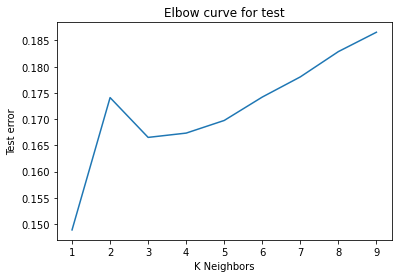

In [58]:

def elbow(k):

    
    error_test = []

   
    for i in k:
       
        model = knn(n_neighbors=i)
        model.fit(X_train,y_train)
         
        tmp =model.predict(X_test)
        tmp = metrics.accuracy_score(tmp,y_test)
        error = 1-tmp
        error_test.append(error)
    return error_test
k = range(1,10)
test = elbow(k)
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow curve for test')
plt.show

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

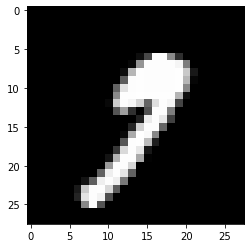

In [60]:
randomdig=X[404] 

randomdig_img=randomdig.reshape((28,28))
plt.figure()
plt.imshow(randomdig_img,cmap='gray')
plt.show()

In [61]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
model.score(X_test, y_test)

0.9565

In [63]:
test_data = dataset.values
test_images = test_data[:10]
test_images.shape


(10, 785)

In [64]:
prediction=model.predict([randomdig])
print(prediction)

[9]
